# 데이터 로드

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
def load_dataset(csv_path, TRAIN_RATIO=0.8):
    
    global X, y, X_train, X_test, y_train, y_test, df
    
    # 데이터셋 로드
    df = pd.read_csv(csv_path)
    
    # 인코딩 방식 변경
    # idxmax 함수는 각 행의 최대값을 가진 열의 인덱스를 반환한다. 따라서 원핫인코딩된 피쳐를 하나의 카테고리 변수로 복원할 수 있음
    df['Fault'] = df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].idxmax(axis=1)
    
    # 라벨 인코딩(원핫인코딩보다 차원수가 줄어드는 효과)
    encoder = LabelEncoder()
    df['Fault'] = encoder.fit_transform(df['Fault'])
    
    # 학습 데이터 분리
    X = df.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'Fault'], axis=1)
    y = df['Fault']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_RATIO, random_state = 83)
    
    return X_train, X_test, y_train, y_test

csv_path = '/mnt/c/Users/k10dh/AppData/Local/Packages/CanonicalGroupLimited.Ubuntu_79rhkp1fndgsc/k10dh/TeamProject/TeamProject1/KDH/Dataset/mulit_classification_data.csv'
X_train, X_test, y_train, y_test = load_dataset(csv_path)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1552, 27) (389, 27) (1552,) (389,)


In [19]:
# 특성공학
# 이상치 제거
df = df[~((df['Pixels_Areas'] > 35000) |
          (df['X_Perimeter'] > 2000) |
          (df['Y_Perimeter'] > 2500) |
          (df['Sum_of_Luminosity'] > 0.5e7))]

# 'TypeOfSteel_A300' + 'TypeOfSteel_400' = 'TypeOfSteel' (A300이면 1)
df['TypeOfSteel'] = df['TypeOfSteel_A300']
df.drop(['TypeOfSteel_A300', 'TypeOfSteel_A400'], axis=1, inplace=True)

# 'Minimum_of_Luminosity' + 'Maximum_of_Luminosity' = 'Mean_of_Luminosity'
df['Mean_of_Luminosity'] = (df['Minimum_of_Luminosity'] + df['Maximum_of_Luminosity']) / 2
df.drop(['Minimum_of_Luminosity', 'Maximum_of_Luminosity'], axis=1, inplace=True)

# 'X_Minimum' + 'X_Maximum' = 'X_Mean'
df['X_Mean'] = (df['X_Minimum'] + df['X_Maximum']) / 2
df.drop(['X_Minimum', 'X_Maximum'], axis=1, inplace=True)

# 'Y_Minimum' + 'Y_Maximum' = 'Y_Mean'
df['Y_Mean'] = (df['Y_Minimum'] + df['Y_Maximum']) / 2
df.drop(['Y_Minimum', 'Y_Maximum'], axis=1, inplace=True)

# 'Log_X_Index', 'Log_Y_Index' 제거
df.drop(['Log_X_Index', 'Log_Y_Index'], axis=1, inplace=True)

# 상관관계가 높은 feature 확인 (절대값 0.9이상)
# 'X_Perimeter' + 'Pixels_Areas'
# 'Y_Perimeter' + 'X_Perimeter'
# 'Sum_of_Luminosity' + 'Pixels_Areas' + 'X_Perimeter'
df.drop(['X_Perimeter', 'Y_Perimeter'], axis=1, inplace=True)

# 로그 스케일링
# df['Log_Pixels_Areas'] = np.log(df['Pixels_Areas']) Sum_of_Luminosity만 활용
df['Log_Sum_of_Luminosity'] = np.log(df['Sum_of_Luminosity'])
df['Log_Y_Mean'] = np.log(df['Y_Mean'])
df.drop(['Pixels_Areas', 'Sum_of_Luminosity', 'Y_Mean'], axis=1, inplace=True)

# 학습 데이터 분리
X = df.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'Fault'], axis=1)
y = df['Fault']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 83)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1551, 18) (388, 18) (1551,) (388,)


In [20]:
df.describe()

,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,...,Stains,Dirtiness,Bumps,Other_Faults,Fault,TypeOfSteel,Mean_of_Luminosity,X_Mean,Log_Sum_of_Luminosity,Log_Y_Mean
count,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,...,1939.000000,1939.000000,1939.000000,1939.00000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000
mean,1459.260959,78.777720,0.332032,0.413977,0.571184,0.033288,0.611075,0.813561,0.575297,2.489928,...,0.037133,0.028365,0.207323,0.34657,2.569881,0.400722,107.402269,595.072718,10.426846,13.743778
std,144.616025,55.100383,0.299704,0.136789,0.270839,0.058947,0.242797,0.234216,0.482408,0.785543,...,0.189135,0.166057,0.405494,0.47600,1.763241,0.490171,21.772871,507.670909,1.793217,1.241757
min,1227.000000,40.000000,0.000000,0.000000,0.009000,0.001500,0.064500,0.048400,0.000000,0.301000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,18.500000,2.000000,5.521461,8.812546
25%,1358.000000,40.000000,0.060400,0.315750,0.361650,0.006600,0.412800,0.597100,0.000000,1.924300,...,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,91.000000,126.500000,9.160835,13.060777
50%,1364.000000,70.000000,0.227800,0.412100,0.558000,0.010100,0.636400,0.947400,1.000000,2.238000,...,0.000000,0.000000,0.000000,0.00000,3.000000,0.000000,107.500000,451.500000,9.862092,13.997623
75%,1650.000000,80.000000,0.575500,0.501400,0.818200,0.023350,0.800000,1.000000,1.000000,2.907950,...,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,119.500000,1061.000000,11.315616,14.595897
max,1794.000000,300.000000,0.995200,0.927500,1.000000,0.875900,1.000000,1.000000,1.000000,4.406100,...,1.000000,1.000000,1.000000,1.00000,6.000000,1.000000,211.500000,1709.000000,14.934447,16.379512


In [21]:
# 오버샘플링(학습데이터만)
from imblearn.over_sampling import SMOTE

# 오버샘플링 전 클래스 분포 확인
print('원본 데이터 크기 X_train: {}'.format(X_train.shape))
print('원본 데이터 크기 y_train: {} \n'.format(y_train.shape))

print("원본 데이터 '1' 개수: {}".format(sum(y_train==1)))
print("원본 데이터 '0' 개수: {} \n".format(sum(y_train==0)))

# SMOTE 적용
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# 오버샘플링 후 클래스 분포 확인
print('샘플링 데이터 크기 X_train: {}'.format(X_train_res.shape))
print('샘플링 데이터 크기 y_train: {} \n'.format(y_train_res.shape))

print("샘플링 데이터 '1' 개수: {}".format(sum(y_train_res==1)))
print("샘플링 데이터 '0' 개수: {}".format(sum(y_train_res==0)))


원본 데이터 크기 X_train: (1551, 18)
원본 데이터 크기 y_train: (1551,) 

원본 데이터 '1' 개수: 43
원본 데이터 '0' 개수: 318 

샘플링 데이터 크기 X_train: (3710, 18)
샘플링 데이터 크기 y_train: (3710,) 

샘플링 데이터 '1' 개수: 530
샘플링 데이터 '0' 개수: 530


In [22]:
# 타겟값과 각 변수들 간의 상관관계
co = X_train.corrwith(y_train)

# 상관계수를 내림차순으로 정리
print(co.sort_values(ascending=False))

# 절대값
co_abs = abs(co)

Orientation_Index        0.136810
Empty_Index              0.129313
Edges_Y_Index            0.076571
Outside_Global_Index     0.069283
Steel_Plate_Thickness    0.058778
TypeOfSteel              0.040343
Mean_of_Luminosity       0.027345
SigmoidOfAreas          -0.022443
Luminosity_Index        -0.033933
Outside_X_Index         -0.096823
Log_Y_Mean              -0.099240
LogOfAreas              -0.107178
Edges_X_Index           -0.110439
Log_Sum_of_Luminosity   -0.112474
Edges_Index             -0.136113
X_Mean                  -0.168924
Square_Index            -0.180232
Length_of_Conveyer      -0.206868
dtype: float64


In [23]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링할 피처 선택
scaling_features = X_train.columns

# 스케일링
scaler = MinMaxScaler()
X_train_scaled = X_train.copy()  # 원본 데이터 복사
X_test_scaled = X_test.copy()    # 원본 데이터 복사
X_train_scaled[scaling_features] = scaler.fit_transform(X_train[scaling_features])
X_test_scaled[scaling_features] = scaler.transform(X_test[scaling_features])

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *

In [25]:
# 모델 하이퍼파라미터 랜덤
import random

# 유닛 랜덤
def units_random():
    # 2의 7제곱 (128)부터 2의 10제곱 (1024)까지
    possible_values = [2**i for i in range(7, 11)]

    # 랜덤하게 8개 선택, 중복 허용
    units = [random.choice(possible_values) for _ in range(8)]

    print(f"units : {units}")
    
    return units

# L2 랜덤
def L2_random():
    # 0.001부터 0.015까지 0.001의 간격으로
    possible_values = np.arange(0.001, 0.016, 0.001)

    # 랜덤하게 8개 선택, 중복 허용
    L2 = [random.choice(possible_values) for _ in range(8)]
    L2 = [round(num, 3) for num in L2]

    print(f"L2 : {L2}")
    
    return L2

In [26]:
# 베이스모델
import tensorflow as tf
from tensorflow.keras import regularizers

def Classifier_Model(units, l2):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=units[0], activation='relu', input_shape=(len(X_train.keys()),), kernel_regularizer=regularizers.l2(l2[0])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=units[1], activation='relu', kernel_regularizer=regularizers.l2(l2[1])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=units[2], activation='relu', kernel_regularizer=regularizers.l2(l2[2])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=units[3], activation='relu', kernel_regularizer=regularizers.l2(l2[3])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=units[4], activation='relu', kernel_regularizer=regularizers.l2(l2[4])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=units[5], activation='relu', kernel_regularizer=regularizers.l2(l2[5])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=units[6], activation='relu', kernel_regularizer=regularizers.l2(l2[6])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=units[7], activation='relu', kernel_regularizer=regularizers.l2(l2[7])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=7, activation='softmax') # 출력 유닛의 수를 클래스 수에 맞추고, softmax 활성화 함수를 사용
    ])
    
    # 옵티마이저와 손실 함수 설정
    optimizer = tf.keras.optimizers.Adam(
                                        learning_rate=0.001,
                                        beta_1=0.9,
                                        beta_2=0.999,
                                        epsilon=1e-08
                                        )

    model.compile(loss='sparse_categorical_crossentropy',  # 손실함수를 다중 클래스 분류에 적합한 형태로 변경
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

In [27]:
# 스킵 연결 모델(Skip Connection)
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Dense, Dropout, Add
from tensorflow.keras.models import Model

def Classifier_Model_SC(units, l2):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    
    inputs = Input(shape=(len(X_train.keys()),))
    x = Dense(units=units[0], activation='relu', kernel_regularizer=regularizers.l2(l2[0]))(inputs)
    x = Dropout(0.2)(x)

    for i in range(1, 8):   
        dense = Dense(units=units[i], activation='relu', kernel_regularizer=regularizers.l2(l2[i]))
        y = dense(x)
        y = Dropout(0.2)(y)
        x = Add()([x, y])

    outputs = Dense(units=7, activation='softmax')(x) # 출력 유닛의 수를 클래스 수에 맞추고, softmax 활성화 함수를 사용

    model = Model(inputs=inputs, outputs=outputs)
    
    # 옵티마이저와 손실 함수 설정
    optimizer = tf.keras.optimizers.Adam(
                                        learning_rate=0.001,
                                        beta_1=0.9,
                                        beta_2=0.999,
                                        epsilon=1e-08
                                        )

    model.compile(loss='sparse_categorical_crossentropy',  # 손실함수를 다중 클래스 분류에 적합한 형태로 변경
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

In [28]:
"""
# 랜덤 서치
# 하이퍼파라미터 세팅
np.random.seed(42)
tf.random.set_seed(42)

LEARNING_RATE = 0.001
EPOCHS = 1024
MB_SIZE = 1024
REPORT = 1
TRAIN_RATIO = 0.8

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=128, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=128, mode='min')

accuracy_list = []

while True:  
    model = Classifier_Model(units_random(), L2_random())
    
    # 모델 학습
    history = model.fit(
    X_train_scaled, y_train,
    batch_size=MB_SIZE,
    validation_split = 0.2,
    verbose=1,
    epochs=EPOCHS,
    callbacks=[es, rlrp]
    )
    
    # 테스트 세트 평가
    loss, accuracy = model.evaluate(X_test_scaled, y_test)
    print("Test Loss:", round(loss, 3))
    print("Test Accuracy:", round(accuracy, 3))
    
    accuracy_list.append(accuracy)
    
    if len(accuracy_list) >= 10:
        max_accuracy = max(accuracy_list)
        units, L2 = units_random(), L2_random()
        print("Maximum Accuracy:", max_accuracy)
        print("units:", units)
        print("L2", L2)
        
        break
"""

'\n# 랜덤 서치\n# 하이퍼파라미터 세팅\nnp.random.seed(42)\ntf.random.set_seed(42)\n\nLEARNING_RATE = 0.001\nEPOCHS = 1024\nMB_SIZE = 1024\nREPORT = 1\nTRAIN_RATIO = 0.8\n\n# 학습 자동 중단 설정\nes = EarlyStopping(monitor=\'loss\', patience=128, mode=\'min\')\nrlrp = ReduceLROnPlateau(monitor=\'loss\', factor=0.2, patience=128, mode=\'min\')\n\naccuracy_list = []\n\nwhile True:  \n    model = Classifier_Model(units_random(), L2_random())\n    \n    # 모델 학습\n    history = model.fit(\n    X_train_scaled, y_train,\n    batch_size=MB_SIZE,\n    validation_split = 0.2,\n    verbose=1,\n    epochs=EPOCHS,\n    callbacks=[es, rlrp]\n    )\n    \n    # 테스트 세트 평가\n    loss, accuracy = model.evaluate(X_test_scaled, y_test)\n    print("Test Loss:", round(loss, 3))\n    print("Test Accuracy:", round(accuracy, 3))\n    \n    accuracy_list.append(accuracy)\n    \n    if len(accuracy_list) >= 10:\n        max_accuracy = max(accuracy_list)\n        units, L2 = units_random(), L2_random()\n        print("Maximum Accuracy:"

In [29]:
""" 앙상블 모델
# 앙상블 모델
def Ensemble(num_models = 5):
    np.random.seed(42)
    tf.random.set_seed(42)
    
    models = []
    
    # 하이퍼파라미터 세팅
    LEARNING_RATE = 0.001
    EPOCHS = 1024
    MB_SIZE = 2000
    REPORT = 1
    TRAIN_RATIO = 0.8
    
    # 학습 자동 중단 설정
    es = EarlyStopping(monitor='loss', patience=64, mode='min')
    rlrp = ReduceLROnPlateau(monitor='loss', factor=0.15, patience=64, mode='min')
    
    optimizer = tf.keras.optimizers.Adam(
                                        learning_rate=0.001,
                                        beta_1=0.9,
                                        beta_2=0.999,
                                        epsilon=1e-08
                                        )

    for _ in range(num_models):
        model = Classifier_Model()
        models.append(model)

    histories = []
    for i in range(num_models):
        history = models[i].fit(
                                X_train_scaled, y_train,
                                batch_size=MB_SIZE,
                                validation_split = 0.2,
                                verbose=1,
                                epochs=EPOCHS,
                                callbacks=[es, rlrp]
                                )
        
        histories.append(history)

    # 각 모델의 예측값을 얻고 평균을 냅니다
    predictions = []
    for model in models:
        loss, accuracy = model.evaluate(X_test_scaled, y_test)
        predictions.append(loss, accuracy)
        print("Test Loss:", round(loss, 3))
        print("Test Accuracy:", round(accuracy, 3))

    # 최종 예측값은 여러 모델의 예측값을 평균낸 것입니다
    final_predictions = np.mean(predictions, axis=0)
    
    return final_predictions
"""

' 앙상블 모델\n# 앙상블 모델\ndef Ensemble(num_models = 5):\n    np.random.seed(42)\n    tf.random.set_seed(42)\n    \n    models = []\n    \n    # 하이퍼파라미터 세팅\n    LEARNING_RATE = 0.001\n    EPOCHS = 1024\n    MB_SIZE = 2000\n    REPORT = 1\n    TRAIN_RATIO = 0.8\n    \n    # 학습 자동 중단 설정\n    es = EarlyStopping(monitor=\'loss\', patience=64, mode=\'min\')\n    rlrp = ReduceLROnPlateau(monitor=\'loss\', factor=0.15, patience=64, mode=\'min\')\n    \n    optimizer = tf.keras.optimizers.Adam(\n                                        learning_rate=0.001,\n                                        beta_1=0.9,\n                                        beta_2=0.999,\n                                        epsilon=1e-08\n                                        )\n\n    for _ in range(num_models):\n        model = Classifier_Model()\n        models.append(model)\n\n    histories = []\n    for i in range(num_models):\n        history = models[i].fit(\n                                X_train_scaled, y_train,

In [30]:
# 모델 객체 생성
"""
units = [33, 64, 128, 256, 256, 128, 64, 33]
L2 = [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000]
model = Classifier_Model(units, L2)
"""
units = [1024 for _ in range(8)]
L2 = [0.001 + i * 0.0025 for i in range(8)]
model = Classifier_Model_SC(units, L2)

In [31]:
# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='auto')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=50, mode='auto')

In [33]:
# 하이퍼파라미터 세팅
LEARNING_RATE = 0.001
EPOCHS = 1024
MB_SIZE = 4000
REPORT = 1
TRAIN_RATIO = 0.8

np.random.seed(42)
tf.random.set_seed(42)

# 모델 학습
history = model.fit(
  X_train_scaled, y_train,
  batch_size=MB_SIZE,
  validation_split = 0.2,
  verbose=1,
  epochs=EPOCHS,
  callbacks=[es, rlrp]
  )

Epoch 1/1024


2023-05-24 00:07:28.251466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-24 00:07:28.300527: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x25a4d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-24 00:07:28.300576: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-05-24 00:07:28.353406: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-24 00:07:31.611672: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901
2023-05-24 00:07:31.983445: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the proces

1/1 [==============================] - 10s 10s/step - loss: 81.9226 - accuracy: 0.0984 - val_loss: 98.9736 - val_accuracy: 0.3280 - lr: 0.0010
Epoch 2/1024
1/1 [==============================] - 0s 66ms/step - loss: 100.4526 - accuracy: 0.3452 - val_loss: 79.5710 - val_accuracy: 0.3280 - lr: 0.0010
Epoch 3/1024
1/1 [==============================] - 0s 64ms/step - loss: 79.8698 - accuracy: 0.3452 - val_loss: 77.0263 - val_accuracy: 0.1897 - lr: 0.0010
Epoch 4/1024
1/1 [==============================] - 0s 62ms/step - loss: 77.3363 - accuracy: 0.2089 - val_loss: 74.3682 - val_accuracy: 0.3183 - lr: 0.0010
Epoch 5/1024
1/1 [==============================] - 0s 60ms/step - loss: 74.5595 - accuracy: 0.3081 - val_loss: 72.3092 - val_accuracy: 0.2186 - lr: 0.0010
Epoch 6/1024
1/1 [==============================] - 0s 60ms/step - loss: 72.4650 - accuracy: 0.2065 - val_loss: 70.2785 - val_accuracy: 0.2219 - lr: 0.0010
Epoch 7/1024
1/1 [==============================] - 0s 59ms/step - loss: 70.

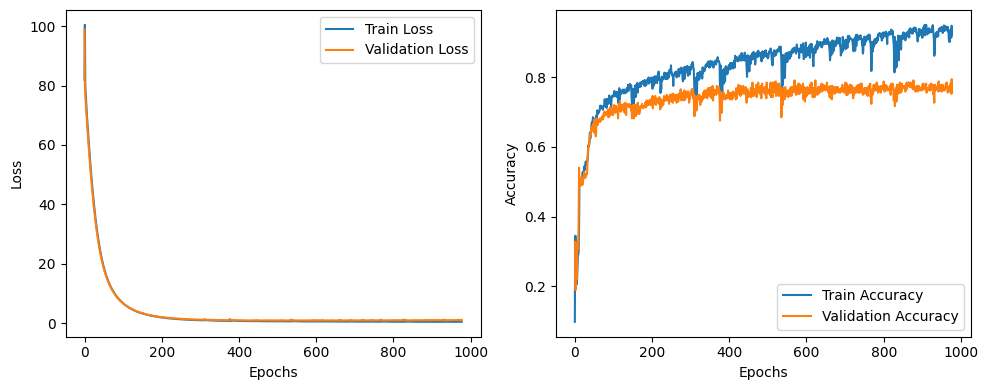

13/13 [==============================] - 0s 8ms/step - loss: 1.1196 - accuracy: 0.7603
Test Loss: 1.12
Test Accuracy: 0.76


In [38]:
import matplotlib.pyplot as plt

# Figure 설정
plt.figure(figsize=(10, 4))

# 손실 그래프
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 평가 지표 추출
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 평가 지표 그래프 그리기
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 그래프 출력
plt.tight_layout()  # 그래프 간 간격 조정
plt.show()

# 테스트 세트 평가
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", round(loss, 3))
print("Test Accuracy:", round(accuracy, 3))

In [39]:
# 모델 가중치 및 편향 저장 (save_weights 메서드를 사용하면 가중치와 편향 모두를 저장)
model.save_weights('classify_model_weights.h5')

# 다음과 같이 저장한 가중치 호출 가능
new_model = Classifier_Model_SC(units, L2)
new_model.load_weights('classify_model_weights.h5')

In [36]:
# best 모델 가중치 및 편향 저장
model.save_weights('best_classify_model.h5') # Test Accuracy: 0.771

In [37]:
# 테스트 세트 평가
loss, accuracy = new_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", round(loss, 3))
print("Test Accuracy:", round(accuracy, 3))

13/13 [==============================] - 0s 8ms/step - loss: 1.1196 - accuracy: 0.7603
Test Loss: 1.12
Test Accuracy: 0.76
